<h1>Removing duplicate images from the dataset<h1>

In [1]:
# Importing necessary libraries to load and process dataset images
import cv2
import os
import matplotlib.pyplot as plt
from PIL import Image
import imagehash
import fnmatch

In [2]:
# Path of the chihuahua folder
PATH_chihuahua = '/Users/matteocastagna/Documents/Università/Magistrale/1_semestre_2/statistical method for machine learning/progetto/dataset/chihuahua'

# Printing number of chihuahua images before cleaning
count = len(fnmatch.filter(os.listdir(PATH_chihuahua), '*.*'))
print(f'Number of chihuahua images before duplicates removal: {count}')

Number of chihuahua images before duplicates removal: 3199


While looking at the dataset I noticed that various images repeats at different resolutions, this makes impossible to remove duplicates through a pixelwise comparison and manually searching for duplicates would be time consuming. A solution can be image hash. Image hashing consists of taking an image and convert it into a 64-bit integer. Once two images have been hashed, the two hashes can be compared bitwise and it can be determined how much the two images are similar or if they're even the same image.

There are several types of image hashing: a-hash (average hash), p-hash (perceptual hash), d-hash (difference hash, using image gradient). After testing both the three main image hashing techniques, a-hash was the one able to detect the most duplicates, therefore is the one used here.
a-hash just reduce the size of the image to a 8x8 pixels square image, turn it grayscale, the mean gray level is computed and then each bit is set to 0 or 1 according to its gray level being greater or smaller then the mean one.

In [3]:
# Each chihuahua image is open singularly and average-hashed, the hash become the key in a dictionary where the associated element is
# the name of the image file. If an hash happens to be already in the dictionary then the name of the associated images is saved in 'to_drop',
# a list containing the names of the duplicate images. Also if an hash happens to be already in the dictionary then that element in the
# dictionary is saved in the list named 'orginal', this is not necessary to delete duplicates but it is just to print later "original" images
# and their duplicates for visualization
hash_name = {}
to_drop = []
original = []
for filename in os.listdir(PATH_chihuahua):
    hash = imagehash.average_hash(Image.open(PATH_chihuahua + '/' + filename))
    if hash in hash_name:
        original.append(hash_name[hash])
        to_drop.append(filename)
    else:
        hash_name[hash] = filename

# Printing filename of images that have duplicates and filename of their duplicates
for i in range(len(to_drop)):
    print(original[i], to_drop[i])

img_0_951.jpg img_0_788.jpg
img_0_1070.jpg img_0_991.jpg
img_4_555.jpg img_4_147.jpg
img_1_1099.jpg img_1_942.jpg
img_3_514.jpg img_3_700.jpg
img_2_671.jpg img_2_52.jpg
img_0_604.jpg img_0_1117.jpg
img_2_498.jpg img_2_113.jpg
img_0_985.jpg img_0_46.jpg
img_2_114.jpg img_2_890.jpg
img_0_777.jpg img_0_808.jpg
img_0_826.jpg img_0_175.jpg
img_1_749.jpg img_1_1060.jpg
img_0_572.jpg img_0_1100.jpg
img_3_918.jpg img_3_317.jpg
img_3_675.jpg img_3_303.jpg
img_3_689.jpg img_3_921.jpg
img_2_462.jpg img_2_1032.jpg
img_1_438.jpg img_1_603.jpg
img_2_329.jpg img_2_27.jpg
img_0_953.jpg img_0_311.jpg
img_0_1059.jpg img_0_1172.jpg
img_4_184.jpg img_4_331.jpg
img_0_969.jpg img_0_270.jpg
img_4_355.jpg img_4_697.jpg
img_4_346.jpg img_4_250.jpg
img_0_1062.jpg img_4_293.jpg
img_0_463.jpg img_0_8.jpg
img_0_955.jpg img_0_851.jpg
img_1_189.jpg img_1_1005.jpg
img_3_670.jpg img_3_58.jpg
img_4_397.jpg img_4_859.jpg
img_0_206.jpg img_3_373.jpg
img_1_819.jpg img_1_1158.jpg
img_3_854.jpg img_3_159.jpg
img_4_569.jpg i

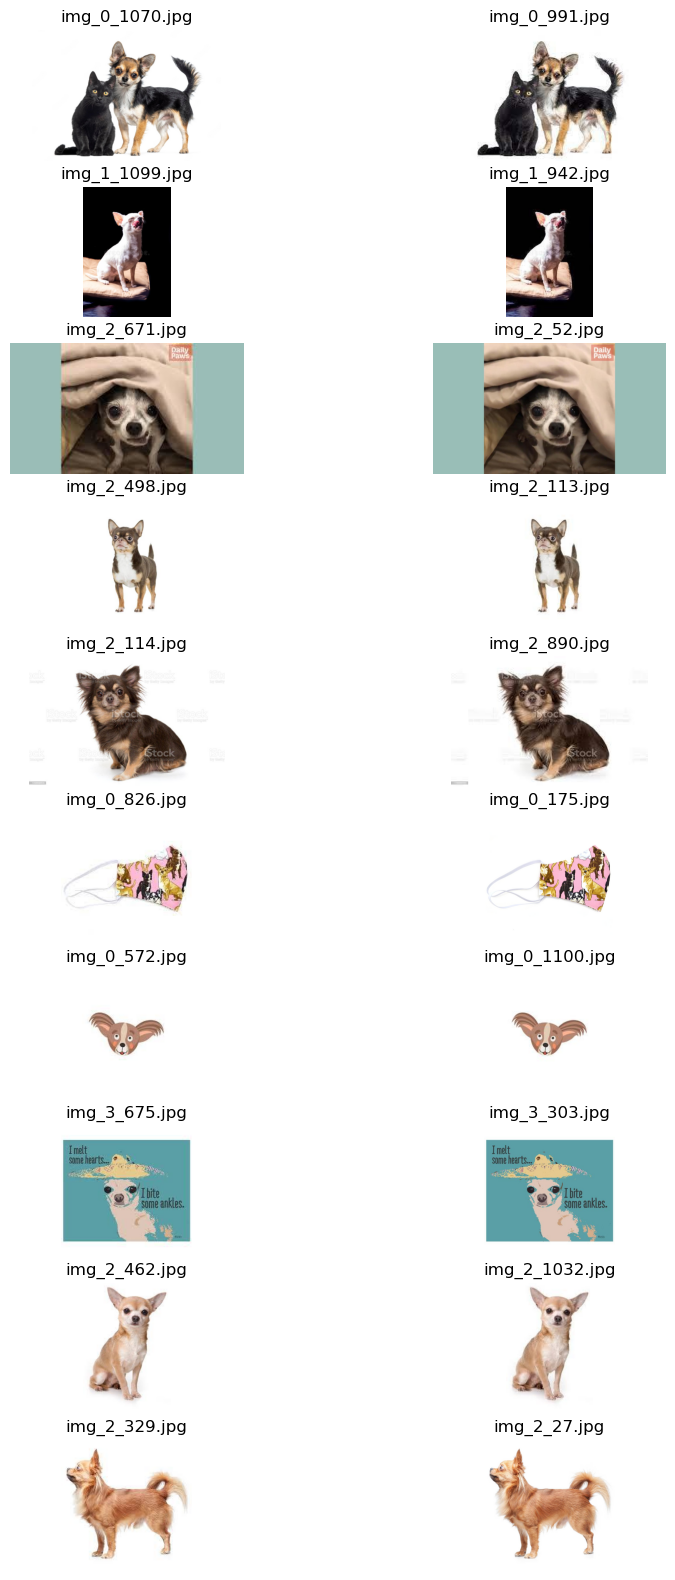

In [4]:
# Plotting the first ten duplicate images of chihuahua
fig = plt.figure(figsize=(10, 20))
rows = 10
columns = 2

c = 0
for i in range(1,20,2):
    fig.add_subplot(rows, columns, i)
    plt.imshow(cv2.cvtColor(cv2.imread(PATH_chihuahua + '/' + original[i]), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(original[i])
    c = c + 1

c = 0
for i in range(1,20,2):
    fig.add_subplot(rows, columns, i + 1)
    plt.imshow(cv2.cvtColor(cv2.imread(PATH_chihuahua + '/' + to_drop[i]), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(to_drop[i])
    c = c + 1


In [5]:
# Removing duplicates from the chihuahua images directory
for filename in to_drop:
    if os.path.exists(PATH_chihuahua + '/' + filename):
        os.remove(PATH_chihuahua + '/' + filename)

# Path of the muffin folder
PATH_muffin = '/Users/matteocastagna/Documents/Università/Magistrale/1_semestre_2/statistical method for machine learning/progetto/dataset/muffin'

# Printing number of muffin images before cleaning
count = len(fnmatch.filter(os.listdir(PATH_muffin), '*.*'))
print(f'Number of muffin images before duplicates removal:{count}')

Number of muffin images before duplicates removal:2718


In [6]:
hash_name = {}
to_drop = []
original = []
for filename in os.listdir(PATH_muffin):
    hash = imagehash.average_hash(Image.open(PATH_muffin + '/' + filename))
    if hash in hash_name:
        original.append(hash_name[hash])
        to_drop.append(filename)
    else:
        hash_name[hash] = filename

# Printing filename of images that have duplicates and filename of their duplicates
for i in range(len(to_drop)):
    print(original[i], to_drop[i])

img_3_703.jpg img_4_812.jpg
img_3_676.jpg img_4_797.jpg
img_0_950.jpg img_0_53.jpg
img_4_393.jpg img_4_784.jpg
img_0_1059.jpg img_2_677.jpg
img_2_300.jpg img_2_610.jpg
img_0_773.jpg img_0_265.jpg
img_0_835.jpg img_0_714.jpg
img_4_47.jpg img_0_528.jpg
img_0_8.jpg img_0_500.jpg
img_1_274.jpg img_1_470.jpg
img_0_83.jpg img_0_9.jpg
img_2_260.jpg img_2_373.jpg
img_0_908.jpg img_0_302.jpg
img_4_324.jpg img_4_334.jpg
img_4_1022.jpg img_4_123.jpg
img_4_747.jpg img_0_261.jpg
img_3_117.jpg img_0_1016.jpg
img_3_854.jpg img_3_229.jpg
img_3_1069.jpg img_3_1302.jpg
img_2_749.jpg img_2_181.jpg
img_3_935.jpg img_0_872.jpg
img_2_274.jpg img_2_356.jpg
img_2_465.jpg img_2_342.jpg
img_2_381.jpg img_2_1076.jpg
img_3_1262.jpg img_3_1112.jpg
img_0_891.jpg img_0_531.jpg
img_0_932.jpg img_0_645.jpg
img_3_164.jpg img_3_963.jpg
img_3_816.jpg img_3_744.jpg
img_2_184.jpg img_2_782.jpg
img_4_479.jpg img_4_704.jpg
img_2_111.jpg img_2_295.jpg
img_2_134.jpg img_2_719.jpg
img_4_1091.jpg img_4_984.jpg
img_0_854.jpg img_

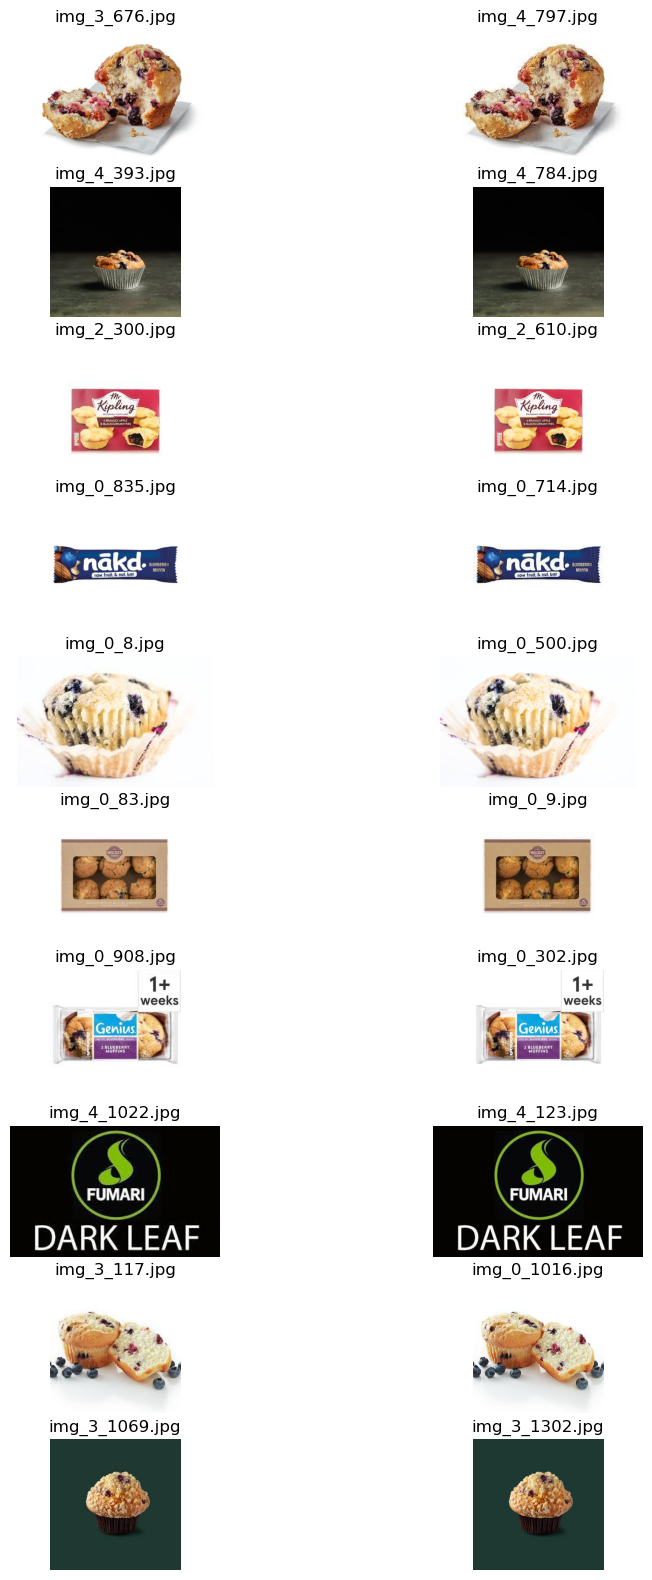

In [7]:
# Plotting the first ten duplicate images of muffin
fig = plt.figure(figsize=(10, 20))
rows = 10
columns = 2

c = 0
for i in range(1,20,2):
    fig.add_subplot(rows, columns, i)
    plt.imshow(cv2.cvtColor(cv2.imread(PATH_muffin + '/' + original[i]), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(original[i])
    c = c + 1

c = 0
for i in range(1,20,2):
    fig.add_subplot(rows, columns, i + 1)
    plt.imshow(cv2.cvtColor(cv2.imread(PATH_muffin + '/' + to_drop[i]), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(to_drop[i])
    c = c + 1


In [8]:
# Removing duplicates from the muffin images directory
for filename in to_drop:
    if os.path.exists(PATH_muffin + '/' + filename):
        os.remove(PATH_muffin + '/' + filename)

# Printing number of chihuahua images after cleaning
count = len(fnmatch.filter(os.listdir(PATH_chihuahua), '*.*'))
print(f'Number of chihuahua images after duplicates removal:{count}')

# printing number of chihuahua images after cleaning
count = len(fnmatch.filter(os.listdir(PATH_muffin), '*.*'))
print(f'Number of muffin images after duplicates removal: {count}')

Number of chihuahua images after duplicates removal:2919
Number of muffin images after duplicates removal: 2670


After the duplicates removal the dataset has been manually inspected in order to remove images that were not chihuahuas or muffins.